## Importing the libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Cleaning the Data

In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
Fuel=pd.get_dummies(df['Fuel_Type'], drop_first=True)
Fuel

,Diesel,Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
296,1,0
297,0,1
298,0,1
299,1,0


In [9]:
T_type=pd.get_dummies(df['Transmission'],drop_first=True)
T_type

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
296,1
297,1
298,1
299,1


In [10]:
df.drop(['Fuel_Type','Transmission'],axis=1,inplace=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Owner
0,ritz,2014,3.35,5.59,27000,Dealer,0
1,sx4,2013,4.75,9.54,43000,Dealer,0
2,ciaz,2017,7.25,9.85,6900,Dealer,0
3,wagon r,2011,2.85,4.15,5200,Dealer,0
4,swift,2014,4.60,6.87,42450,Dealer,0


In [12]:
df=pd.concat([df,T_type,Fuel],axis=1)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Owner,Manual,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Dealer,0,1,0,1
4,swift,2014,4.60,6.87,42450,Dealer,0,1,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Seller_Type    301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Manual         301 non-null    uint8  
 8   Diesel         301 non-null    uint8  
 9   Petrol         301 non-null    uint8  
dtypes: float64(2), int64(3), object(2), uint8(3)
memory usage: 17.5+ KB


In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Seller_Type', 'Owner', 'Manual', 'Diesel', 'Petrol'],
      dtype='object')

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Manual,Diesel,Petrol
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.867110,0.199336,0.794020
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.340021,0.400166,0.405089
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,1.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

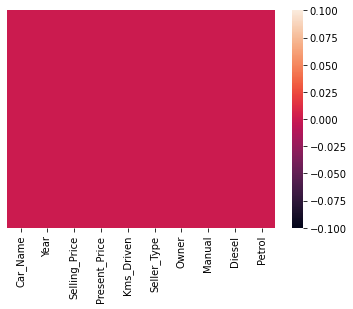

In [17]:
sns.heatmap(df.isnull(), yticklabels=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

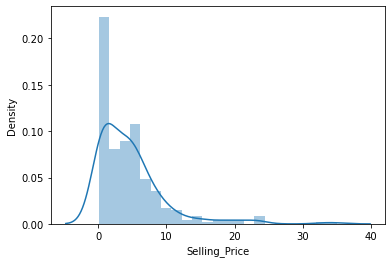

In [18]:
sns.distplot(df['Selling_Price'])

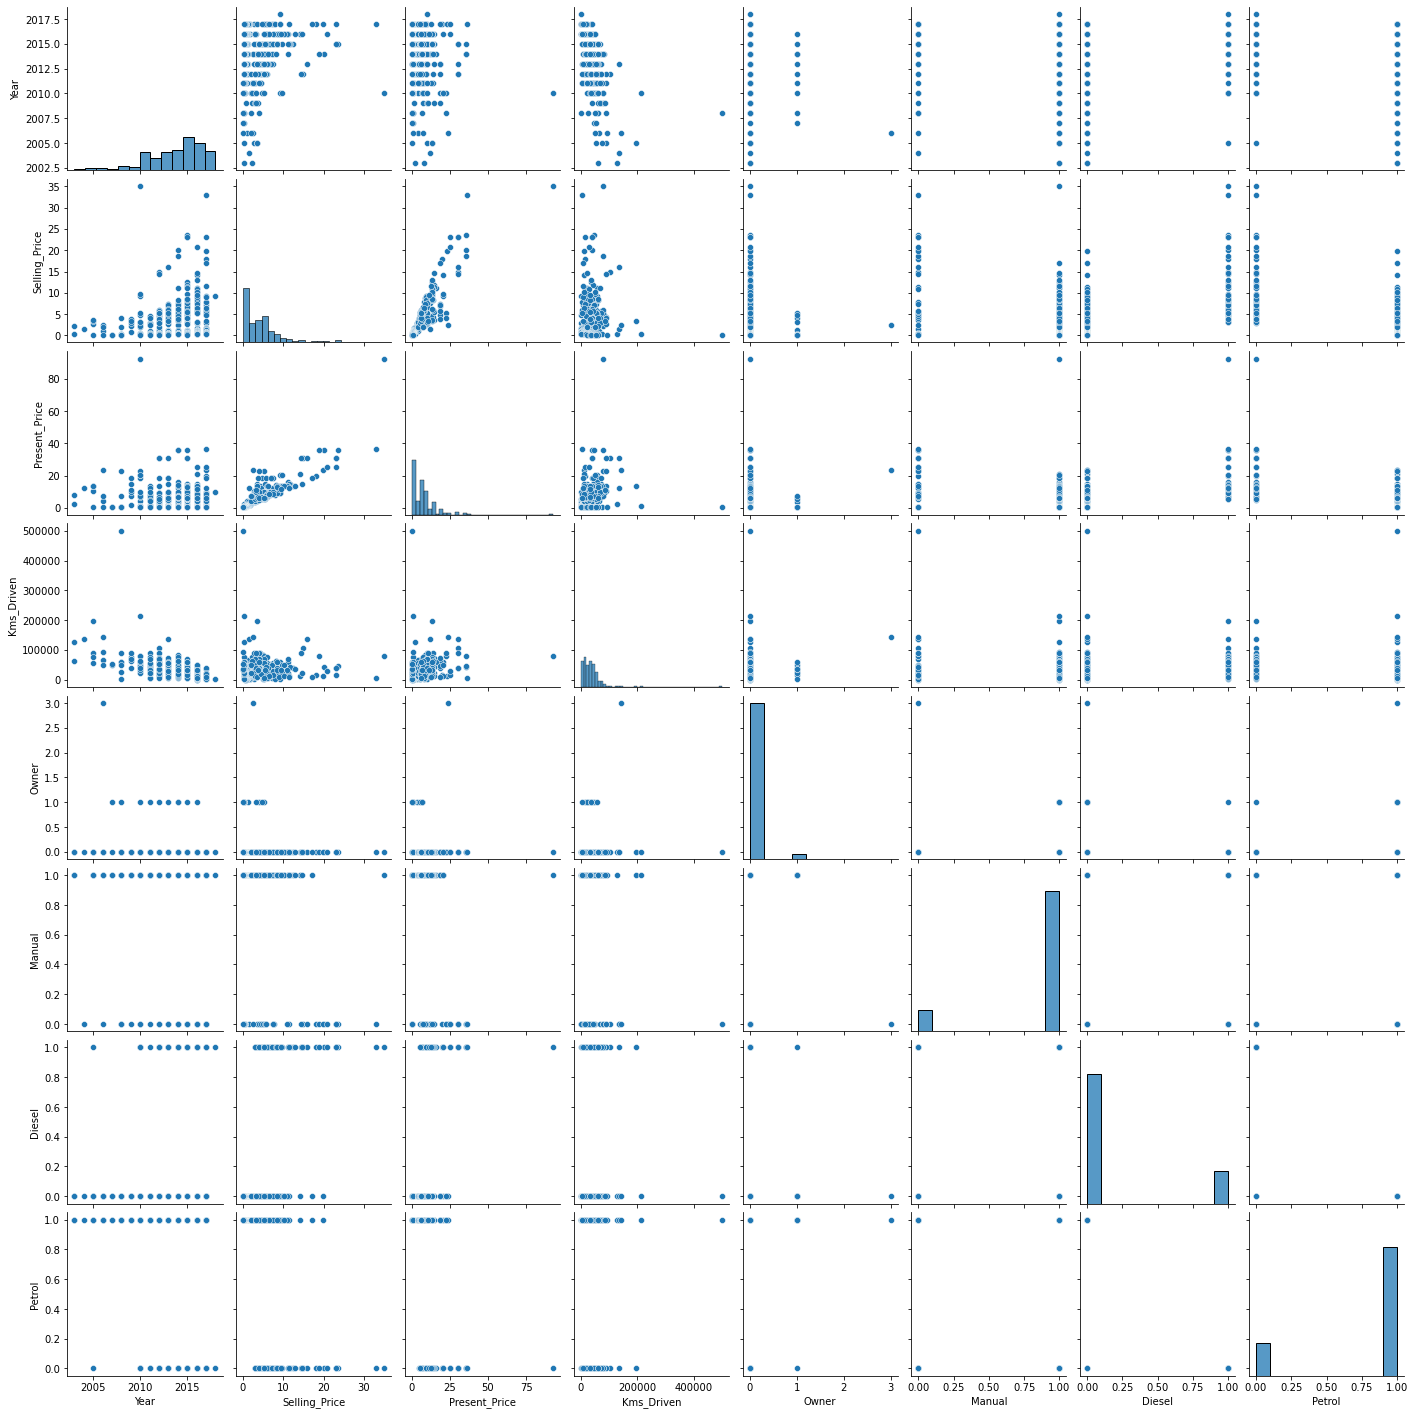

In [19]:
sns.pairplot(data=df)

<AxesSubplot:>

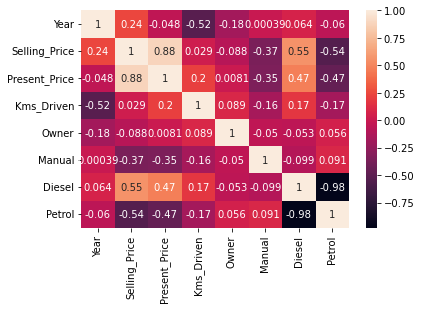

In [20]:
sns.heatmap(df.corr(),annot=True)

## Selecting the independent and dependent columns

In [21]:
X=df[[ 'Year',  'Present_Price', 'Kms_Driven','Manual','Diesel','Petrol']]

In [22]:
y=df['Selling_Price']

In [23]:
X

,Year,Present_Price,Kms_Driven,Manual,Diesel,Petrol
0,2014,5.59,27000,1,0,1
1,2013,9.54,43000,1,1,0
2,2017,9.85,6900,1,0,1
3,2011,4.15,5200,1,0,1
4,2014,6.87,42450,1,1,0
...,...,...,...,...,...,...
296,2016,11.60,33988,1,1,0
297,2015,5.90,60000,1,0,1
298,2009,11.00,87934,1,0,1
299,2017,12.50,9000,1,1,0


In [24]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
X_train

,Year,Present_Price,Kms_Driven,Manual,Diesel,Petrol
1,2013,9.54,43000,1,1,0
133,2016,0.95,500,1,0,1
284,2013,5.90,9800,1,0,1
280,2015,5.90,14465,1,0,1
134,2017,0.81,11800,1,0,1
...,...,...,...,...,...,...
40,2016,7.87,24524,0,0,1
75,2015,6.80,36000,1,0,1
87,2012,13.74,56000,1,0,1
63,2015,35.96,47000,0,1,0


In [28]:
X_test

,Year,Present_Price,Kms_Driven,Manual,Diesel,Petrol
176,2011,1.05,30000,1,0,1
253,2014,9.90,48000,1,1,0
12,2015,9.94,15000,0,0,1
16,2015,10.79,41678,1,1,0
193,2013,0.65,24000,1,0,1
...,...,...,...,...,...,...
183,2013,0.47,21000,1,0,1
119,2013,1.90,5400,1,0,1
57,2010,18.54,50000,1,0,1
37,2003,2.28,127000,1,0,1


## Using Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
lm.coef_

array([ 4.51802057e-01,  4.58497223e-01, -4.86423496e-06, -1.92334021e+00,
        2.25269376e+00, -1.55160758e-01])

In [33]:
lm.intercept_

-907.0061621362667

In [34]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coeffiecents'])
coeff_df

,Coeffiecents
Year,0.451802
Present_Price,0.458497
Kms_Driven,-0.000005
Manual,-1.923340
Diesel,2.252694
Petrol,-0.155161


In [35]:
predictions=lm.predict(X_test)

In [36]:
predictions

array([-0.17523221,  7.55817268,  7.70432006,  8.44878896,  0.57415842,
        6.19390394,  6.87225777,  7.49559913,  1.39949302,  6.4369906 ,
        4.76694852,  0.84068086, -3.22772909,  2.83227496, 11.03916371,
        3.74955075,  6.1959226 ,  2.01181483,  2.49469491,  7.84169773,
        3.77274373,  2.44230891,  5.58020277,  8.89416049,  0.62789854,
        5.23144477,  1.47597019,  3.88391126,  4.70502446,  4.07534983,
        2.1784941 , 10.346451  ,  1.2092426 ,  7.8735682 ,  3.88220016,
       -0.16119395,  2.44873962, -2.30981154,  6.49697248, -0.76791843,
        2.58438497,  3.88806501,  8.70661962,  9.34302042,  1.56974124,
        4.43258889, -2.87450759,  7.42610018,  6.00661399,  9.41384038,
        6.22019857,  2.09952641,  6.94318215, -1.74850785,  4.70565681,
        4.39110553,  1.51606408,  2.91401722,  7.10896931,  7.41043734,
       -1.8141146 ,  9.36504777,  2.40584117,  7.58804769,  7.59569024,
        6.4500154 , 11.27708915,  1.07147713,  5.2737577 ,  6.81

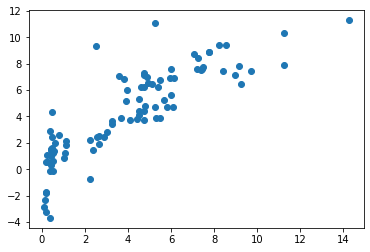

In [37]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

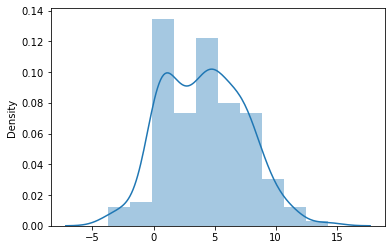

In [38]:
sns.distplot((y_test,predictions))

In [39]:
from sklearn import metrics

In [40]:
print("MAE:", metrics.mean_absolute_error(y_test ,predictions))
print("MSE:",metrics.mean_squared_error(y_test ,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.3346685906942664
MSE: 3.2943438353536645
RMSE: 1.8150327367167967


In [41]:
coeff_df

,Coeffiecents
Year,0.451802
Present_Price,0.458497
Kms_Driven,-0.000005
Manual,-1.923340
Diesel,2.252694
Petrol,-0.155161


## Saving the Model

In [42]:
import pickle
pickle.dump(lm,open('car_price.pkl', 'wb'))

## Loading and Testing the Model

In [43]:
loadedmodel=pickle.load(open('car_price.pkl','rb'))

In [44]:
loadedmodel

LinearRegression()

In [45]:
Year =2014
Present_Price =5.59
Kms_Driven= 27000
Manual=1
Diesel=0
Petrol=1

In [46]:
prediction=loadedmodel.predict([[ Year,  Present_Price, Kms_Driven,Manual,Diesel,Petrol]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
prediction

3.2763440572641684